https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/Part%203%20-%20Autoencoders.ipynb

In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.optimizers import Adam

In [161]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [162]:
import random
x_train_lines=np.empty_like(x_train)
x_train_lines = x_train.copy()

for t in range(0,x_train_lines.shape[0]):
    rands = np.array([])
    for i in range(0,4):
        rands = np.append(rands,random.randint(0,27))
        testMatrix = x_train_lines[t].reshape(28,28)
    for y in rands:
        for i in range(0,28):
            testMatrix[np.int16(y)][i] = 1
    x_train_lines[t] = testMatrix.reshape(1,784)

In [166]:
input_size = 784
hidden_size = 256
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_lines, x_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.1400
Epoch 2/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.1063
Epoch 3/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.1001
Epoch 4/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.0965
Epoch 5/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.0943


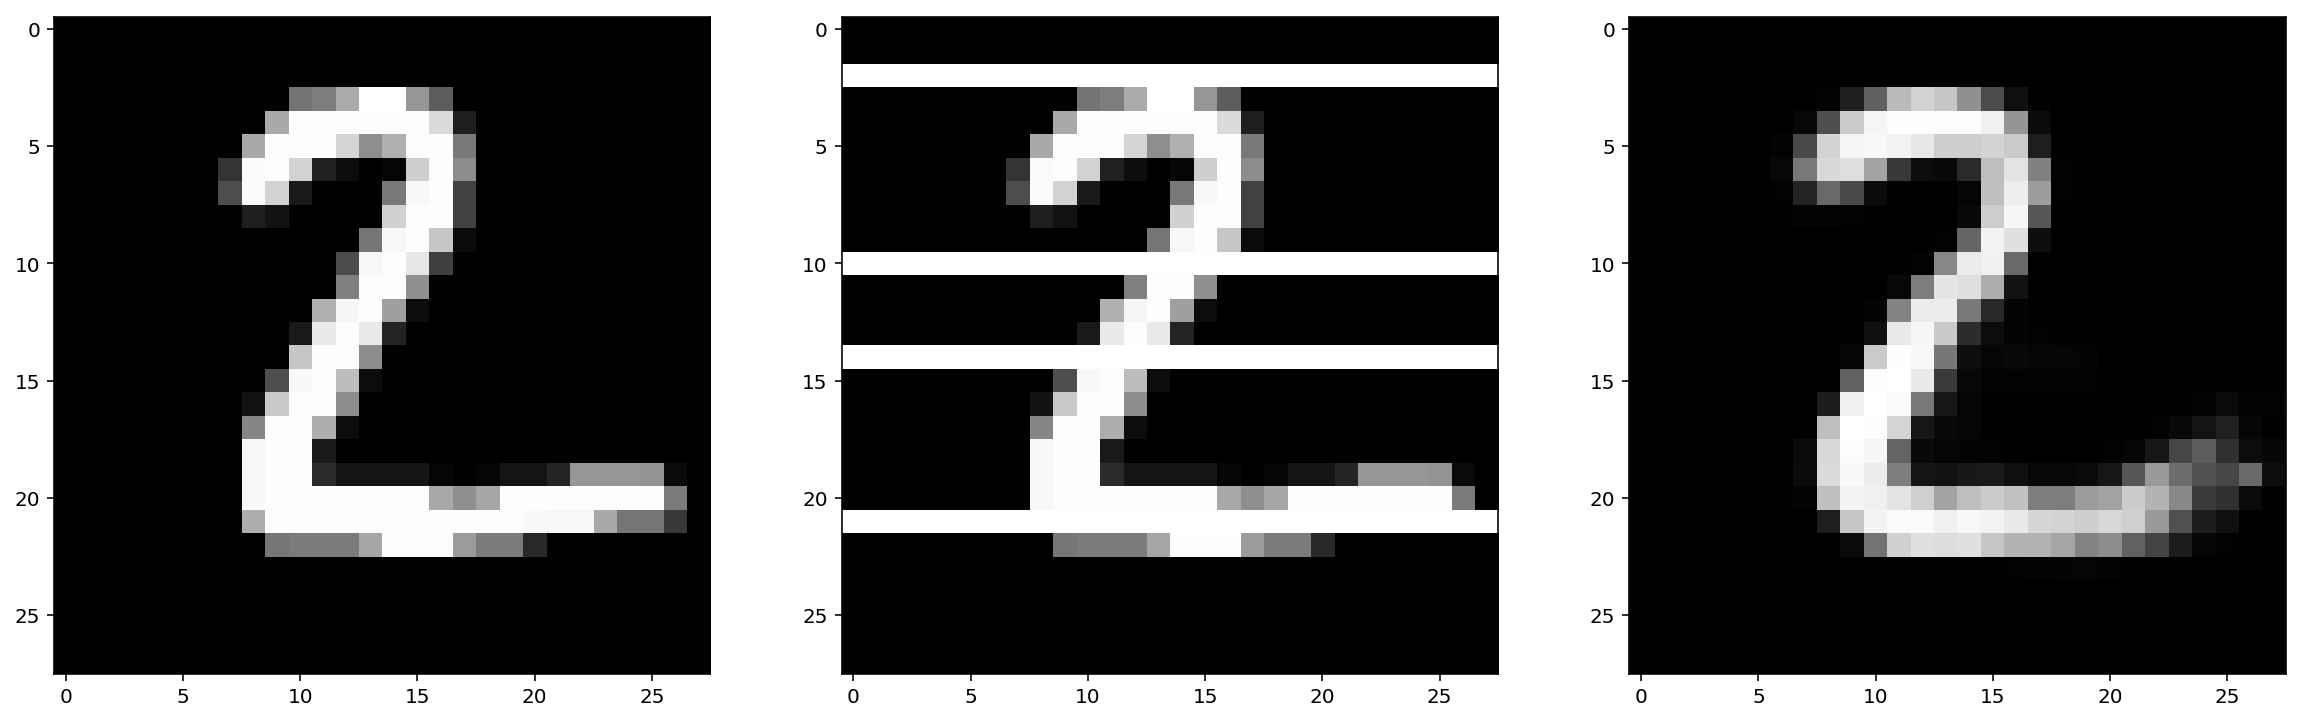

In [167]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
image = x_test[1].copy().reshape(28,28)
image_lines = image.copy()

for i in range(0,28):
    image_lines[2][i] = 1
    image_lines[10][i] = 1
    image_lines[14][i] = 1
    image_lines[21][i] = 1
#     image_lines[9][i] = 1
#     image_lines[10][i] = 1
#     image_lines[11][i] = 1
#     image_lines[12][i] = 1
image_pred = autoencoder.predict(image_lines.reshape(1,784)).reshape(28,28)

ax1.imshow(image)
ax2.imshow(image_lines)
ax3.imshow(image_pred)
fig.set_size_inches(20,10)
fig.show()